In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import zipfile

with zipfile.ZipFile("../input/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("../input/test1.zip","r") as z:
    z.extractall(".")

# Any results you write to the current directory are saved as output.

#print(os.listdir("/kaggle/working/train"))

['test1.zip', 'train.zip', 'sampleSubmission.csv']


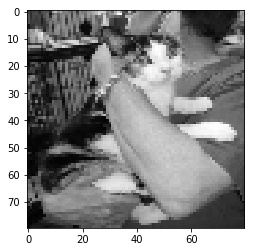

In [17]:
main_dir = "/kaggle/working/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break


In [18]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
    

In [19]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [20]:
#import pickle

#pickle.dump( X, open( "train_x", "wb" ) )
#pickle.dump( y, open( "train_y", "wb" ) )


In [21]:
#Normalize data
X = X/255.0

In [22]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 279us/step - loss: 0.6382 - acc: 0.6312 - val_loss: 0.5577 - val_acc: 0.7248
Epoch 2/10
20000/20000 [==============================] - 5s 246us/step - loss: 0.5187 - acc: 0.7429 - val_loss: 0.5306 - val_acc: 0.7410
Epoch 3/10
20000/20000 [==============================] - 5s 257us/step - loss: 0.4518 - acc: 0.7867 - val_loss: 0.4763 - val_acc: 0.7762
Epoch 4/10
20000/20000 [==============================] - 5s 244us/step - loss: 0.3909 - acc: 0.8219 - val_loss: 0.4975 - val_acc: 0.7708
Epoch 5/10
20000/20000 [==============================] - 5s 246us/step - loss: 0.3360 - acc: 0.8514 - val_loss: 0.4953 - val_acc: 0.7866
Epoch 6/10
20000/20000 [==============================] - 5s 252us/step - loss: 0.2759 - acc: 0.8831 - val_loss: 0.5074 - val_acc: 0.7844
Epoch 7/10
20000/20000 [==============================] - 5s 245us/step - loss: 0.2112 - acc: 0.9138 - val_loss: 0.5810 - v

In [24]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [25]:
predictions = model.predict(X_test)

In [26]:
predicted_val = [int(round(p[0])) for p in predictions]

In [27]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [28]:
submission_df.to_csv("submission.csv", index=False)